* This is my first machine learning model on kaggle.

In [33]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # graph plotting

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/gender_submission.csv
/kaggle/input/titanic/test.csv


* Let's import the test and the train set. 

In [34]:
import pandas as pd
gender_submission = pd.read_csv("../input/titanic/gender_submission.csv")
test_data = pd.read_csv("../input/titanic/test.csv")
train_data = pd.read_csv("../input/titanic/train.csv")

* We'll now print the first five data in our train set

In [35]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


* We'll now print the first five data in our test set

In [36]:
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


* Let's check the gender based probability of survival that survived

(0, 100)

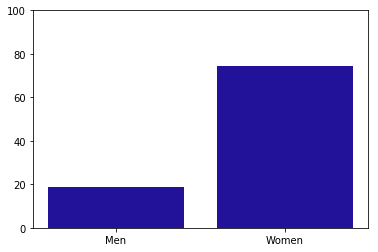

In [49]:
women = train_data.loc[train_data.Sex == 'female']["Survived"]
men = train_data.loc[train_data.Sex == 'male']["Survived"]
rate_women = sum(women)/len(women)*100
rate_men = sum(men)/len(men)*100

_, gx = plt.subplots()

gx.bar(['Men','Women'], [rate_men,rate_women], color = '#221199', align = 'center')
gx.set_ylim([0,100])

As the gender based distribution seems to be very helping, hence the 'Gender' feature is a good feature to work on.
* Lets check the age based probability of survival. Here we'll store the age and the survival of that aged person on a particular graph to get an intuition about what our features should look like

Text(0.5, 1.0, 'Age v/s Probability of death')

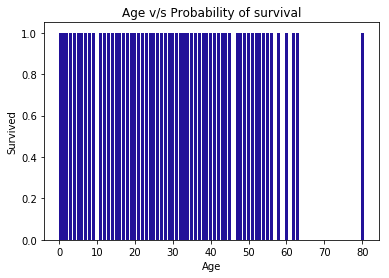

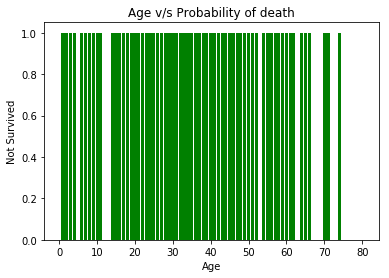

In [50]:
age_data = train_data.loc[train_data.Age.notnull()]["Age"]
y_age = train_data.loc[train_data.Age.notnull()]["Survived"]

_, sx = plt.subplots()

sx.bar(age_data, y_age, color = '#221199', align = 'center')

sx.set_ylabel('Survived')
sx.set_xlabel('Age')
sx.set_title('Age v/s Probability of survival')

_, nsx = plt.subplots()

nsx.bar(age_data, y_age == 0, color = '#008000', align = 'center')
nsx.set_ylabel('Not Survived')
nsx.set_xlabel('Age')
nsx.set_title('Age v/s Probability of death')

As the age distribution seem to be very even, hence the 'Age' feature isn't worth it to work on.
* Evaluation of different models is necessary for the implementation of the **"Just Right"** algorithm you wish you had.

In [51]:
from sklearn.neural_network import MLPClassifier

y = train_data["Survived"]

features = ["Pclass", "Sex", "SibSp", "Parch"]
X = pd.get_dummies(train_data[features])
X_test = pd.get_dummies(test_data[features])

model = MLPClassifier(solver='lbfgs', alpha=1e-5,
                      hidden_layer_sizes=(5,5,5,5,5,5), random_state=1)
model.fit(X, y)
predictions = model.predict(X_test)

output = pd.DataFrame({'PassengerId': test_data.PassengerId, 'Survived': predictions})
output.to_csv('my_submission.csv', index=False)
print("Your submission was successfully saved!")

Your submission was successfully saved!
